# Credit Risk Modelling

Credit risk modeling is a fundamental aspect of risk management in the financial industry, particularly in lending institutions like banks and credit card companies. It involves assessing the likelihood of borrowers defaulting on their loans or failing to meet their financial obligations. By accurately predicting credit risk, lenders can make informed decisions about lending money and setting appropriate interest rates to mitigate potential losses.

Here's an overview of the key components and concepts involved in credit risk modeling:

Data Collection: The first step in credit risk modeling is to gather relevant data about borrowers and their credit histories. This typically includes information such as  payment history, and other financial indicators.

Data Preprocessing: Once the data is collected, it undergoes preprocessing steps to clean, transform, and prepare it for analysis. This may involve handling missing values, removing outliers, encoding categorical variables, and scaling numerical features.

Feature Engineering: Feature engineering involves creating new features or transforming existing ones to improve the predictive power of the model.

Model Selection: There are various machine learning and statistical modeling techniques used in credit risk modeling, including logistic regression, decision trees, random forests, gradient boosting machines (GBM), support vector machines (SVM), and neural networks. The choice of model depends on factors such as the complexity of the problem, the size of the dataset, interpretability requirements, and the trade-off between accuracy and computational resources.

Model Training: Once the model is selected, it is trained on historical data using supervised learning techniques. The model learns patterns and relationships in the data to predict the likelihood of default or creditworthiness for new borrowers.

Model Evaluation: After training the model, it is evaluated using validation data to assess its performance and generalization ability. Common evaluation metrics for credit risk models include accuracy, precision, recall, F1-score, area under the ROC curve (AUC-ROC), and Gini coefficient.

Model Deployment: Once the model is deemed satisfactory, it can be deployed into production to make real-time predictions on new loan applications or credit decisions. It's important to monitor the model's performance over time and update it as necessary to maintain accuracy and effectiveness.

Credit risk modeling is a dynamic and evolving field, with ongoing advancements in data science, machine learning, and regulatory requirements shaping the development of more sophisticated and robust models. Effective credit risk modeling enables lenders to make informed decisions, optimize their lending portfolios, and manage risk effectively in the ever-changing financial landscape.

Data links:
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset


This dataset employed a binary variable, default payment next month (Yes = 1, No = 0), as the response variable. The model uses the following 26 features as raw input:

ID: ID of each client

LIMIT_BAL: Amount of given credit in dollars (includes individual and family/supplementary credit

JOB_TYPE: 15 types of occupations

WORK_YEARS: number of work years

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school; 0, 4, 5, 6=others)

MARRIAGE: Marital status (1=married, 2=single, 3 = divorced, 0=others)

AGE: Age in years

PAY_0: Repayment status in September, 2015 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)

PAY_2: Repayment status in August, 2015 (scale same as above)

PAY_3: Repayment status in July, 2015 (scale same as above)

PAY_4: Repayment status in June, 2015 (scale same as above)

PAY_5: Repayment status in May, 2015 (scale same as above)

PAY_6: Repayment status in April, 2015 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2015 (dollar)

BILL_AMT2: Amount of bill statement in August, 2015 (dollar)

BILL_AMT3: Amount of bill statement in July, 2015 (dollar)

BILL_AMT4: Amount of bill statement in June, 2015 (dollar)

BILL_AMT5: Amount of bill statement in May, 2015 (dollar)

BILL_AMT6: Amount of bill statement in April, 2015 (dollar)

PAY_AMT1: Amount of previous payment in September, 2015 (dollar)

PAY_AMT2: Amount of previous payment in August, 2015 (dollar)

PAY_AMT3: Amount of previous payment in July, 2015 (dollar)

PAY_AMT4: Amount of previous payment in June, 2015 (dollar)

PAY_AMT5: Amount of previous payment in May, 2015 (dollar)

PAY_AMT6: Amount of previous payment in April, 2015 (dollar)


## Importing the libraries and reading the data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data
credit_risk= pd.read_csv("UCI_Credit_Card.csv")#UCI_Credit_Card
credit_risk

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
### Here I am doing to copy the original data in data frame called df.
df= credit_risk.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data preparation and Pre-processing

The data set was taken from kaggle for credit risk modelling. The data initially revealed a total of 25 features. It is very important to clean the data in a suitable format before developing any machine learning model.

In [4]:
# Lets see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

We are working with a data set containing 25 features for 30,000 clients. "default.payment.next.month" is a feature and is the target variable we are trying to predict.

In [5]:
# As we seen Column ID has no meaning here so, we will remove it
df.drop(["ID"], axis=1, inplace= True) #axis=1 -- column removal and inplcae= True --means change in the original data

In [6]:
# Lets check the statistics of data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# checking for missing values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

 We do not find any missing values in our data set.

### Analysis of column "EDUCATION"

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [8]:
# Lets see the value counts in EDUCATION columns:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown"
#Changing 0,5 and 6 to keep it under 1 category.

df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

### Aalysis of column "MARRIAGE"

Marital status (1=married, 2=single, 3=others)

In [10]:
# lets see the values count in column marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
# Here I am going to map 0 with 1
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

### Analysis of column "PAY_0 to PAY_6"

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [12]:
# Lets see the value counts in column 'PAY_0'
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [13]:
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
df.rename(columns={"default payment next month": "Default"}, inplace=True)



## Data Visualization

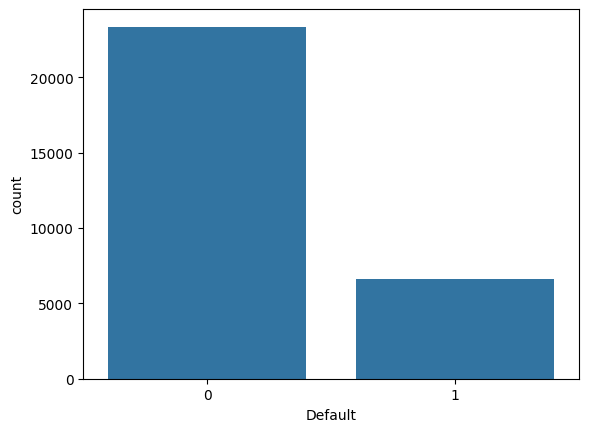

In [14]:
import seaborn as sns


# count plot on single categorical variable
sns.countplot(x ='Default', data = df)

# Show the plot
plt.show()

Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

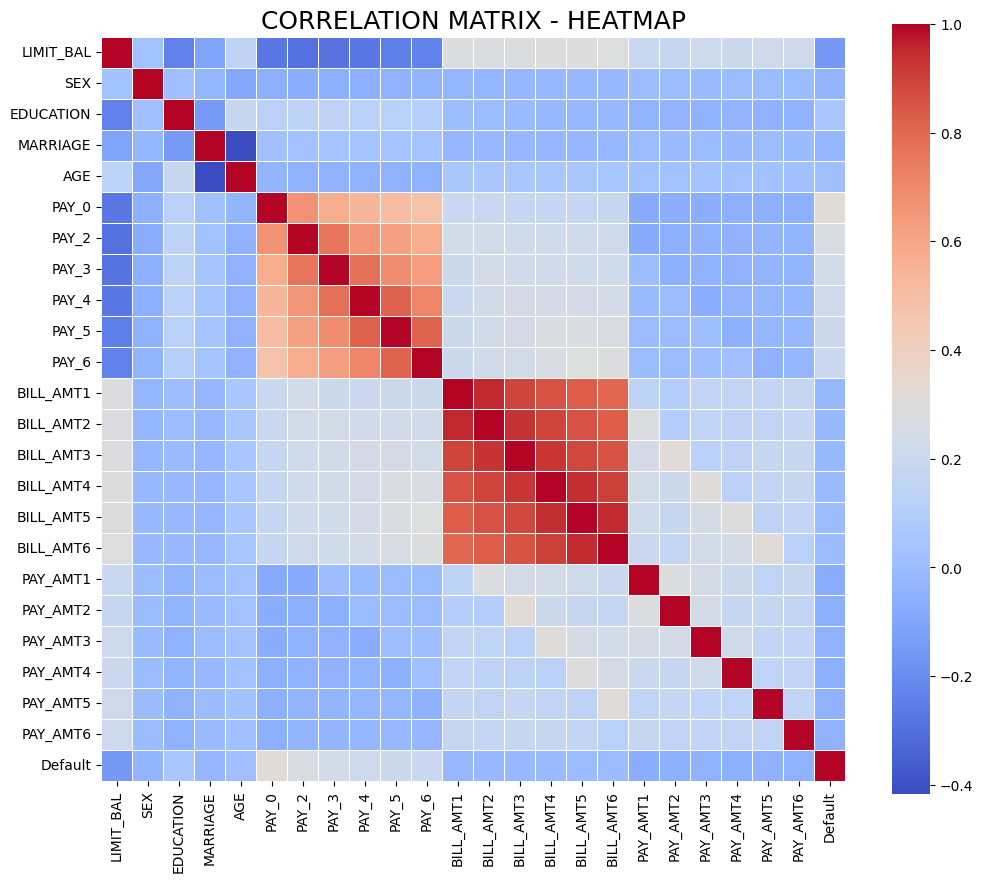

In [80]:
#  looking at correlations matrix, defined via Pearson function
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f',
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax )
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

In [15]:
# Lets count it
df['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

So, By looking at the target varibale we could say that, our data is pretty much imbalance. We would like to make it balanced before going to trained the model.

## Creating Independent features and depened features

In [22]:
# Independnet features
X = df.drop(['Default'], axis=1)
# Dependent feature
y = df['Default']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## Handeling Missing Values

In [23]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_imp = imp_mean.fit_transform(X)

X_imp = pd.DataFrame(X_imp,columns = X.columns)
X_imp.head().T

,0,1,2,3,4
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0
PAY_5,-2.0,0.0,0.0,0.0,0.0


## One-hot-encoding


In [24]:
columns_categ = ["JOB_TYPE", "SEX", "MARRIAGE", "EDUCATION"]

#OHE_job = pd.get_dummies(X_imp['JOB_TYPE'], prefix='JOB_TYPE', drop_first = False)
OHE_sex = pd.get_dummies(X_imp['SEX'], prefix='SEX', drop_first = False)
OHE_marriage = pd.get_dummies(X_imp['MARRIAGE'], prefix='MARRIAGE', drop_first = False)
OHE_education = pd.get_dummies(X_imp['EDUCATION'], prefix='EDUCATION', drop_first = False)
columns_all = X_imp.columns.tolist()

columns_exclude = ["ID", "JOB_TYPE", "SEX", "MARRIAGE", "EDUCATION", "Default"]

# get all the numerical variables names
columns_numerical = [column for column in columns_all if column not in columns_exclude]

# concatenate the one-hot-encoding columns and numerical columns as the input data

df_input = pd.concat([OHE_sex, OHE_marriage, OHE_education, X_imp[columns_numerical]], axis = 1)#OHE_job,

df_input.head().T

,0,1,2,3,4
SEX_1.0,0.0,0.0,0.0,0.0,1.0
SEX_2.0,1.0,1.0,1.0,1.0,0.0
MARRIAGE_1.0,1.0,0.0,0.0,1.0,1.0
MARRIAGE_2.0,0.0,1.0,1.0,0.0,0.0
MARRIAGE_3.0,0.0,0.0,0.0,0.0,0.0
EDUCATION_1.0,0.0,0.0,0.0,0.0,0.0
EDUCATION_2.0,1.0,1.0,1.0,1.0,1.0
EDUCATION_3.0,0.0,0.0,0.0,0.0,0.0
EDUCATION_4.0,0.0,0.0,0.0,0.0,0.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0


## Scalling the features
- So, scalling the independent features are very important so that our model is not biased toward the higher range of values. To make all features in same range
- Here we are using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(df_input)

X_scaled = pd.DataFrame(X_scaled,columns = df_input.columns)
X_scaled.head().T

,0,1,2,3,4
SEX_1.0,-0.810161,-0.810161,-0.810161,-0.810161,1.234323
SEX_2.0,0.810161,0.810161,0.810161,0.810161,-1.234323
MARRIAGE_1.0,1.089819,-0.917584,-0.917584,1.089819,1.089819
MARRIAGE_2.0,-1.066471,0.937672,0.937672,-1.066471,-1.066471
MARRIAGE_3.0,-0.104326,-0.104326,-0.104326,-0.104326,-0.104326
EDUCATION_1.0,-0.757068,-0.757068,-0.757068,-0.757068,-0.757068
EDUCATION_2.0,1.066900,1.066900,1.066900,1.066900,1.066900
EDUCATION_3.0,-0.442752,-0.442752,-0.442752,-0.442752,-0.442752
EDUCATION_4.0,-0.064163,-0.064163,-0.064163,-0.064163,-0.064163
LIMIT_BAL,-1.136720,-0.365981,-0.597202,-0.905498,-0.905498


## Feature selection

In [26]:

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to your training data
rf_classifier.fit(X_scaled, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a dictionary to store feature names and their corresponding importances
feature_importance_dict = {}

for i, feature_name in enumerate(X_scaled.columns):
    feature_importance_dict[feature_name] = feature_importances[i]

# Sort features based on their names and scores in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted features and their importances
for feature_name, importance in sorted_feature_importances:
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: PAY_0, Importance: 0.09464136103585329
Feature: AGE, Importance: 0.06563089184316621
Feature: LIMIT_BAL, Importance: 0.0594816027927999
Feature: BILL_AMT1, Importance: 0.05945368022907191
Feature: BILL_AMT2, Importance: 0.05290548662814494
Feature: BILL_AMT3, Importance: 0.051214347209519326
Feature: PAY_AMT1, Importance: 0.050659821513107835
Feature: BILL_AMT4, Importance: 0.04921927342577489
Feature: BILL_AMT5, Importance: 0.04896057475728487
Feature: BILL_AMT6, Importance: 0.048868039722962386
Feature: PAY_AMT2, Importance: 0.04756815017240182
Feature: PAY_AMT6, Importance: 0.04513296818031577
Feature: PAY_AMT3, Importance: 0.04496488080701578
Feature: PAY_AMT4, Importance: 0.04251264127683901
Feature: PAY_2, Importance: 0.042225093819104574
Feature: PAY_AMT5, Importance: 0.04198487511453531
Feature: PAY_3, Importance: 0.027504722533699993
Feature: PAY_4, Importance: 0.024925518049008825
Feature: PAY_5, Importance: 0.022161742840855536
Feature: PAY_6, Importance: 0.01822049

In [27]:
columns_X = [x_selected for x_selected in X_scaled.columns if x_selected not in ['MARRIAGE_3.0', "MARRIAGE_1", "EDUCATION_4", "JOB_TYPE_7.943978070926846", 'SEX_1.6131796563691674']]
print(columns_X)

['SEX_1.0', 'SEX_2.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0', 'EDUCATION_4.0', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [28]:
X_final = X_scaled[columns_X]

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_final,y,test_size=0.20,random_state=42)

## Balancing the data
- For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is widely used in practice to address class imbalance, particularly in scenarios where the minority class is small and important to predict accurately. However, it's essential to use SMOTE judiciously and in conjunction with other techniques such as proper model evaluation, parameter tuning, and feature selection to ensure the best performance of the machine learning model. Additionally, it's worth noting that SMOTE may not always be suitable for all datasets, and its effectiveness can vary depending on the specific characteristics of the data and the modeling task at hand.

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))



Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import  precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve


## Building Model
- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier


### Logistic regression Model:

In [32]:
from sklearn.linear_model import LogisticRegression

logit= LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [33]:

y_pred_logit = logit.predict(X_test)
y_pro_logit = logit.predict_proba(X_test)[:, 1]

print("AUC Score : %.4f" % roc_auc_score(y_test, y_pro_logit))
print("Accuracy : %.4f \n" % accuracy_score(y_test, y_pred_logit))

AUC Score : 0.7322
Accuracy : 0.6813 



#### Evaluation metrics

In [34]:
print("The accuracy of logit model is:", accuracy_score(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))

The accuracy of logit model is: 0.6813333333333333
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      4687
           1       0.37      0.67      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.68      0.62      6000
weighted avg       0.77      0.68      0.71      6000



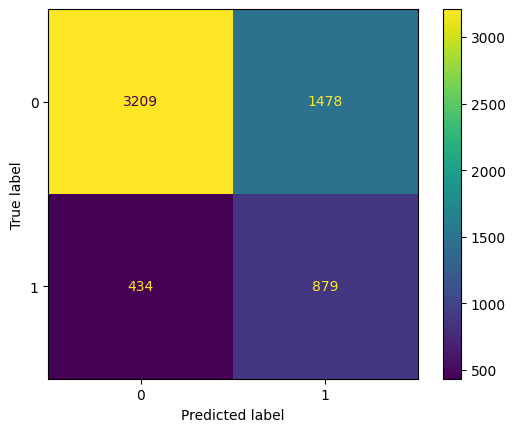

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

cm = confusion_matrix(y_test, y_pred_logit, labels=logit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logit.classes_)
disp.plot()
plt.show()

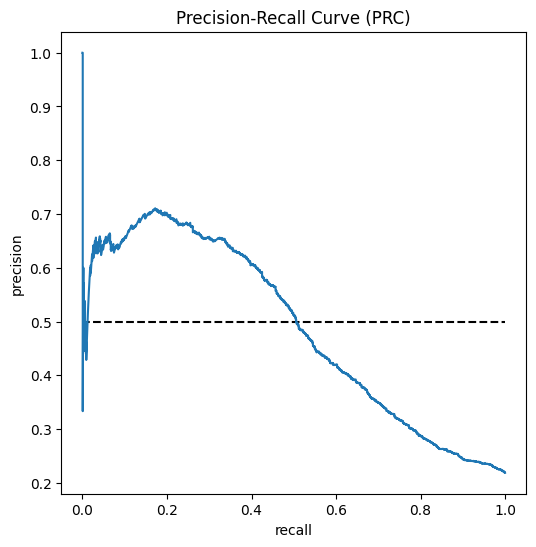

In [117]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pro_logit)
plt.figure(figsize = (6,6))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve (PRC)')
plt.show()

### Random Forest Classifer

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
# Predicting the model


y_pred_rf = rf.predict(X_test)
y_pro_rf = rf.predict_proba(X_test)[:, 1]

print("AUC Score : %.4f" % roc_auc_score(y_test, y_pro_rf))
print("Accuracy : %.4f \n" % accuracy_score(y_test, y_pred_rf))

AUC Score : 0.7480
Accuracy : 0.7883 



#### Evaluating the model

In [79]:
print("The accuracy of logit model is:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf ))

The accuracy of logit model is: 0.7883333333333333
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      4687
           1       0.52      0.46      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.78      6000



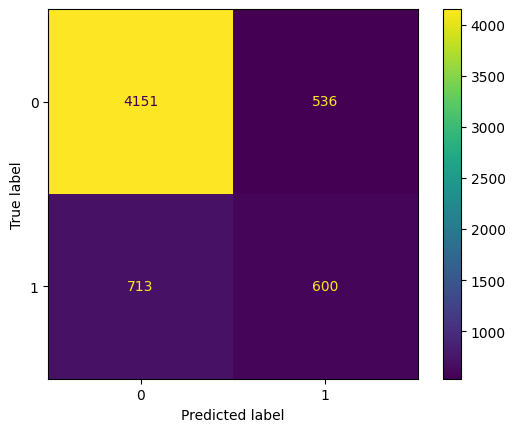

In [39]:
# Plot confusion metrics

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

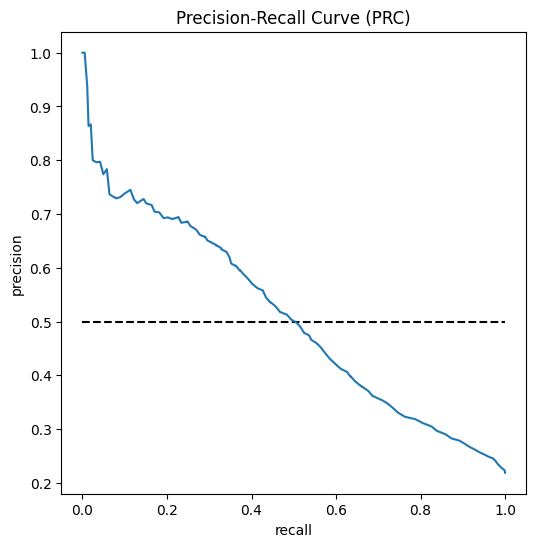

In [40]:
# plot pprcision_recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pro_rf)
plt.figure(figsize = (6,6))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve (PRC)')
plt.show()

### XGBoost Classifier

In [72]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier(scale_pos_weight=4, max_delta_step= 1,subsample= 0.8,colsample_bytree= 0.8,eval_metric= 'auc')
#fitting the model
xgb_clf.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=None, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, n_jobs=None, num_parallel_tree=None,
              random_state=None, ...)

In [73]:
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

y_pred_xgb = xgb_clf.predict(X_test)
y_pro_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print("AUC Score : %.4f" % roc_auc_score(y_test, y_pro_xgb))
print("Accuracy : %.4f \n" % accuracy_score(y_test, y_pred_xgb))


AUC Score : 0.7518
Accuracy : 0.6670 



### Evaluating the model

In [74]:

print(classification_report(y_test,y_pred_xgb ))

              precision    recall  f1-score   support

           0       0.89      0.66      0.75      4687
           1       0.37      0.71      0.48      1313

    accuracy                           0.67      6000
   macro avg       0.63      0.68      0.62      6000
weighted avg       0.77      0.67      0.69      6000



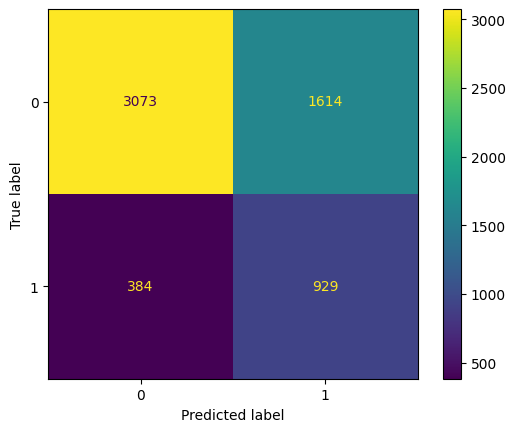

In [75]:
# Plot confusion metrics
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

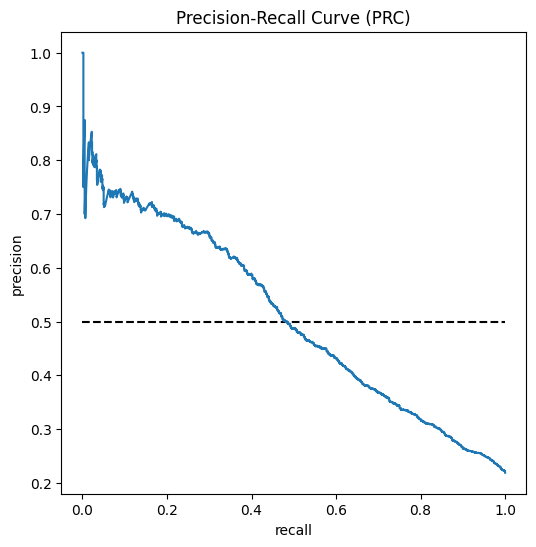

In [50]:
# plot pprcision_recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pro_xgb)
plt.figure(figsize = (6,6))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve (PRC)')
plt.show()

## Hyperparameter tunning

In [60]:
## Hyper Parameter Optimization
import xgboost as xgb
params={'scale_pos_weight' : [1, 2, 3, 4, 5, 6, 7],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [61]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [62]:
xgb_c= xgb.XGBClassifier()
random_search=RandomizedSearchCV(xgb_c,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'scale_pos_weight': [1, 2, 3, 4, 5, 6,
                                                             7]},
                   scoring='roc_auc', verbose=3)

In [63]:
# Finding the best estimators
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
# Finding the best param
random_search.best_params_

{'scale_pos_weight': 1,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [65]:
xgb_t=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.3,
                                  learning_rate=0.3,
                                  max_depth=15,
                                  reg_lambda=10,
                                  min_child_weight=1,
                                  colsample_bytree=0.3)

# Fitting the model
xgb_t.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
# Predicting model
y_pred= xgb_t.predict(X_test)

y_pred_xgbt = xgb_t.predict(X_test)
y_pro_xgbt = xgb_t.predict_proba(X_test)[:, 1]

print("AUC Score : %.4f" % roc_auc_score(y_test, y_pro_xgbt))
print("Accuracy : %.4f \n" % accuracy_score(y_test, y_pred_xgbt))

AUC Score : 0.7501
Accuracy : 0.7990 



#### Evaluating the model after hyperparameter tuning

In [67]:

print(classification_report(y_test,y_pred_xgbt))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4687
           1       0.56      0.41      0.47      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.66      0.67      6000
weighted avg       0.78      0.80      0.79      6000



### Cross validation

In [77]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_t,X_final,y,cv=10)

In [78]:
score

array([0.97253433, 0.97253433, 0.97253433, 0.97253433, 0.97211819,
       0.97211819, 0.97253433, 0.97253433, 0.9725229 , 0.9725229 ])

In [79]:
score.mean()

0.9724488158882719